# wyniki testów

In [1]:
from some_functions import *
from popularity_model import *
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import sys
sys.path.append('../main_model')
# autorskie ploty :P
from plots import barplot

In [3]:
results = get_db(r'C:\Users\a814811\OneDrive - Atos\RecommenderSystem\Piotr\model\ev_wsp_MC\res.csv')

In [4]:
# na pcozatku wizualizuje tylko te skrajne przypadki, pozniej mozna usunac ta linijke
results = results.iloc[28:,:]
results.head(1)

,modelName,recall@5,precision@5,f1_score@5,ndcg@5,recall@10,precision@10,f1_score@10,ndcg@10,recall@15,precision@15,f1_score@15,ndcg@15,weight
28,p_model,0.24009,0.048018,0.08003,0.163253,0.363029,0.036303,0.066005,0.203548,0.451442,0.030096,0.05643,0.229092,"(100, 1, 1)"


### f1 score for different weight

In [5]:
# names = list(results['weight'])
# n = len(names)
# ogólne wyniki
        # f1 = results[ ['f1_score@5','f1_score@10','f1_score@15'] ]
        # re = results[ ['recall@5','recall@10','recall@15'] ]
        # pr = results[ ['precision@5','precision@10','precision@15'] ]

In [5]:
# do średnich
rr = results.groupby('weight')[['f1_score@5','f1_score@10','f1_score@15',
                               'recall@5','recall@10','recall@15',
                               'precision@5','precision@10','precision@15']].mean().reset_index()
names = list(rr['weight'])
n = len(names)
rr

,weight,f1_score@5,f1_score@10,f1_score@15,recall@5,recall@10,recall@15,precision@5,precision@10,precision@15
0,"(1, 1, 100)",0.077300,0.065163,0.056167,0.231901,0.358397,0.449339,0.046380,0.035840,0.029956
1,"(1, 100, 1)",0.075139,0.063614,0.055270,0.225417,0.349877,0.442157,0.045083,0.034988,0.029477
2,"(1, 100, 100)",0.075789,0.064290,0.055853,0.227367,0.353595,0.446826,0.045473,0.035359,0.029788
3,"(100, 1, 1)",0.079470,0.065883,0.056677,0.238409,0.362358,0.453417,0.047682,0.036236,0.030228
4,"(100, 1, 100)",0.080356,0.067114,0.057968,0.241068,0.369128,0.463746,0.048214,0.036913,0.030916


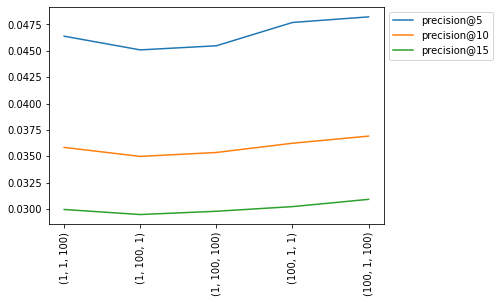

In [6]:
plt.plot(np.arange(n),rr.iloc[:,7],label='precision@5')
plt.plot(np.arange(n),rr.iloc[:,8],label='precision@10')
plt.plot(np.arange(n),rr.iloc[:,9],label='precision@15')
plt.legend(bbox_to_anchor=(1, 1, 0, 0))
plt.xticks(ticks=np.arange(n),labels=names, rotation=90)
plt.show()

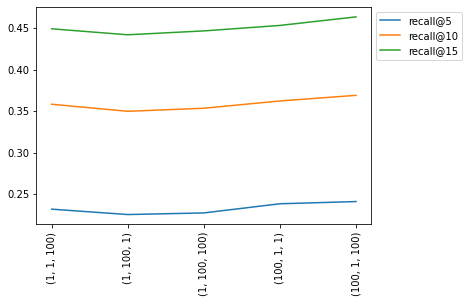

In [7]:
plt.plot(np.arange(n),rr.iloc[:,4],label='recall@5')
plt.plot(np.arange(n),rr.iloc[:,5],label='recall@10')
plt.plot(np.arange(n),rr.iloc[:,6],label='recall@15')
plt.legend(bbox_to_anchor=(1, 1, 0, 0))
plt.xticks(ticks=np.arange(n),labels=names, rotation=90)
plt.show()

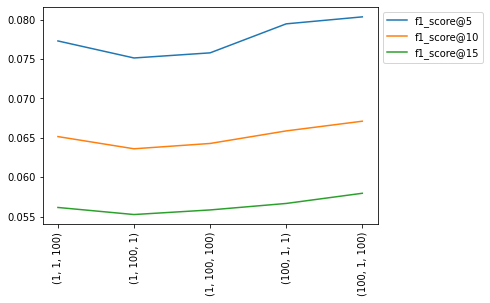

In [8]:
plt.plot(np.arange(n),rr.iloc[:,1],label='f1_score@5')
plt.plot(np.arange(n),rr.iloc[:,2],label='f1_score@10')
plt.plot(np.arange(n),rr.iloc[:,3],label='f1_score@15')
plt.legend(bbox_to_anchor=(1, 1, 0, 0))
plt.xticks(ticks=np.arange(n),labels=names, rotation=90)
plt.show()

#### % of users without recommendation for model